In [1]:
import os
print(os.getcwd())


C:\Users\HP


In [4]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
#model_selection Este módulo incluye utilidades para dividir conjuntos de datos en subconjuntos de 
#entrenamiento y prueba, realizar validación cruzada y ajustar hiperparámetros de modelos.
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
#La función train_test_split se utiliza para dividir los datos en un conjunto de entrenamiento y un 
#conjunto de prueba, que son esenciales para evaluar el rendimiento del modelo en datos no vistos.

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

importar archivo .xlsx

In [9]:
archivo_excel = "C:/Users/HP/Desktop/RocketLaunchDataCompleted.xlsx"
launch_data = pd.read_excel(archivo_excel)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [10]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [11]:
#descripcion general de los datos 
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

Las filas que no tienen Yen la Launchedcolumna no tuvieron un lanzamiento de cohete, así que haga que esos valores que faltan sean N.
Para las filas en las que falta información sobre si el cohete estaba tripulado o no tripulado, suponga que no estaba tripulado. Sin tripulación es más probable porque hubo menos misiones tripuladas.
Si falta la dirección del viento, márquelo como unknown.
Para los datos de condición faltantes, suponga que fue un día típico y use fair.
Para cualquier otro dato, utilice un valor de 0.

In [12]:
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


Debido a que los cálculos son más adecuados para entradas numéricas, convierta todo el texto en números. Como ejemplo, usaremos 1si un cohete está tripulado y 0si un cohete no está tripulado.

In [13]:
## Como parte del proceso de limpieza de datos, tenemos que convertir datos de texto a numéricos porque las computadoras solo entienden números
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [14]:
#vemos los datos nuevamente 
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


In [15]:
#eliminar columnas 
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = launch_data

Los Xdatos de entrada representan el clima para un día en particular. En este caso, no nos preocupa la fecha ni la hora. Queremos que el perfil meteorológico de ese día indique si debe realizarse un lanzamiento, no la fecha ni la hora.



In [16]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

Veamos la documentación del clasificador del árbol de decisión . Comprender la importancia de los dos parámetros especificados aquí: random_statey max_depth.

El random_stateparámetro se utiliza para la mayoría de los algoritmos de aprendizaje automático. Controla la aleatoriedad del algoritmo. Cuando usa este estimador para dividir los datos en datos para entrenar y datos para probar, la semilla que se proporciona aquí dicta la aleatoriedad de esa división. La siguiente unidad proporciona más información sobre la división de datos.

El max_depthparámetro es un parámetro específico del árbol que le permite definir el alcance de la salida del modelo. En este caso, no es tan informativo conocer todas las probabilidades posibles de una condición climática específica y cómo podría afectar la probabilidad del lanzamiento de un cohete. La profundidad tiene un tope de cinco para limitar el conocimiento adquirido a lo que está más relacionado en la práctica con el resultado.

In [17]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

Este código separa aleatoriamente los datos en cuatro grupos: X_train, X_test, y_trainy y_test. Con la función de scikit-learn train_test_split, especifica cuatro parámetros importantes:

Datos de entrada: X- Todas las columnas que queremos usar para predecir un lanzamiento.
Datos de salida: y- El resultado de cada fila (si se lanzó un cohete o no).
Tamaño de la prueba: 0.2- La capacitación en el 80 % de sus datos y la prueba en el 20 % es una división común en la ciencia de datos.
Estado aleatorio: 99- Una semilla aleatoria que cambiará la aleatoriedad de seleccionar los datos.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

Ajustar el modelo es como hacer un examen de práctica en el que tiene acceso a las respuestas para asegurarse de que comprende los conceptos.

In [21]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [22]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [23]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.9833333333333333

In [24]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

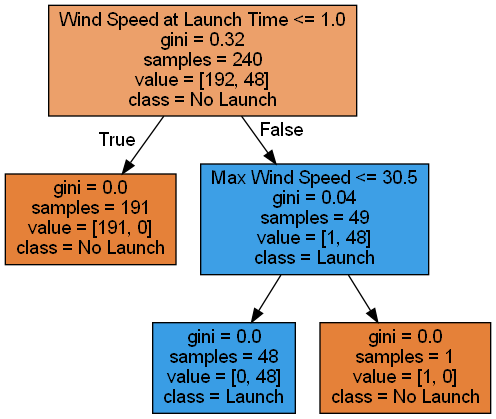

In [25]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

El 30 de julio de 2020, la NASA lanzó el rover Perseverance a Marte desde Cabo Cañaveral a las 7:50 a. m., hora del este.

Reúna los datos de entrada para el modelo:

Con tripulación o sin tripulación
Alta temperatura
Baja temperatura
Temperatura promedio
Temperatura en el momento del lanzamiento
Temperatura alta histórica
Hist baja temperatura
Hist Ave Temp
Precipitación en el momento del lanzamiento
Precipitación av histórica
Dirección del viento
Velocidad máxima del viento
Visibilidad
Velocidad del viento en el momento del lanzamiento
Hist Ave Max Velocidad del viento
Hist Ave Visibilidad
Condición

In [26]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)